## 0. Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    balanced_accuracy_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    confusion_matrix
)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.utils import resample
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)

In [2]:
sklearn.__version__

'1.0.2'

## 1. Відкрити та зчитати наданий файл з даними.

In [2]:
df = pd.read_csv(r"WQ-R.csv",sep=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Визначити та вивести кількість записів.

In [6]:
print(f"Кількість колонок - {df.shape[0]}\nКільість стовпців - {df.shape[1]}")

Кількість колонок - 1599
Кільість стовпців - 12


# 3. Видалити атрибут quality.

In [7]:
# Split data
y = df["quality"]
X = df.drop(["quality"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4. Вивести атрибути, що залишилися.

In [10]:
labels = X.columns
print(f"Залишилось {X.shape[1]} стовпців(атрибутів).\nАтрибути які лишились:\n{X.columns.to_list()}")

Залишилось 11 стовпців(атрибутів).
Атрибути які лишились:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 1. KMeans (optimum n_clusters)
# 2. scatterplot (color for each cluster) per each pair of attributes

In [ ]:
# pca (inverse), t-sne (no-inverse), umap (no-inverse)
# 1. umap (11 -> 2)
# 2. KMeans (optimum n_clusters)
# 3. scatterplot (color for each cluster)

## 5. Використовуючи функцію KMeans бібліотеки scikit-learn, виконати:
розбиття набору даних на кластери з випадковою початковою
ініціалізацією і вивести координати центрів кластерів.
Оптимальну кількість кластерів визначити на основі початкового
набору даних трьома різними способами:



In [12]:
inertia, silhouette_scores = [], []

k_values = range(2, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

In [13]:
for center in cluster_centers:
    print(center)

[8.05405405e+00 5.31756757e-01 3.24054054e-01 3.19459459e+00
 8.46756757e-02 2.69459459e+01 1.26000000e+02 9.97371892e-01
 3.23297297e+00 7.79459459e-01 9.65405405e+00]
[ 8.371       0.522775    0.25685     2.35725     0.0848     14.625
 37.75        0.99683815  3.33635     0.63675    10.4355    ]
[ 8.11981132  0.5529717   0.28801887  2.44811321  0.10881132 16.85849057
 64.99056604  0.99703387  3.29688679  0.68122642 10.03946541]
[7.9000e+00 3.0000e-01 6.8000e-01 8.3000e+00 5.0000e-02 3.7500e+01
 2.8350e+02 9.9316e-01 3.0100e+00 5.1000e-01 1.2300e+01]
[ 7.77980769  0.60317308  0.24490385  2.81153846  0.08742308 20.32692308
 86.80769231  0.99688808  3.34048077  0.63298077 10.10224359]
[ 8.54793388  0.52650826  0.28595041  2.45764463  0.08649174  5.0661157
 12.42975207  0.99637417  3.3053719   0.62152893 10.79483471]
[ 8.45819672  0.52766393  0.26106557  2.5307377   0.10262295 14.23360656
 49.13934426  0.9971427   3.29877049  0.67442623 10.24918033]
[ 8.34222222  0.47633333  0.28233333  

## 5.1 elbow method;

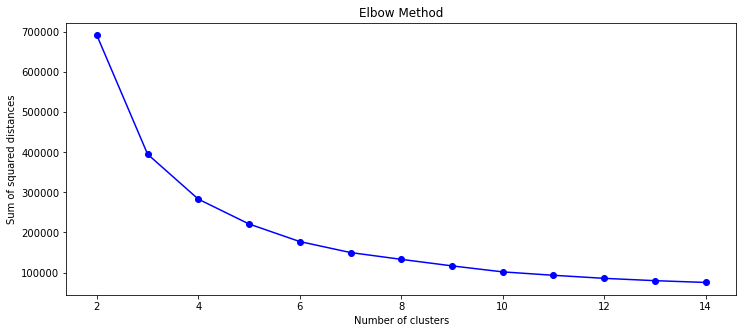

In [20]:
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
# pip install yellowbrick

In [13]:
# KElbowVisualizer
# By default, the scoring parameter metric is set to distortion,
# which computes the sum of squared distances from each point to its assigned center.

# However, two other metrics can also be used with the KElbowVisualizer – silhouette and calinski_harabasz.
# The silhouette score calculates the mean Silhouette Coefficient of all samples,
# while the calinski_harabasz score computes the ratio of dispersion between and within clusters.
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html?highlight=metric

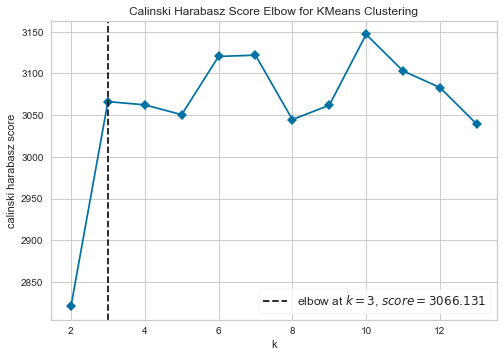

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    model, k=(2,14), metric='calinski_harabasz', timings=False
)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
# distortion - 5, silhouette - 2, calinski_harabasz - 3

## 5.2 average silhouette method;

In [27]:
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Oптимальнe количествo кластеров с наивысшим показателем силуэта - {optimal_k}")

Oптимальнe количествo кластеров с наивысшим показателем силуэта - 2


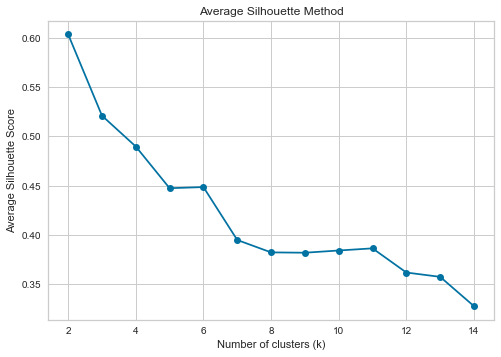

In [28]:
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Method')
plt.show()

## 5.3 prediction strength method

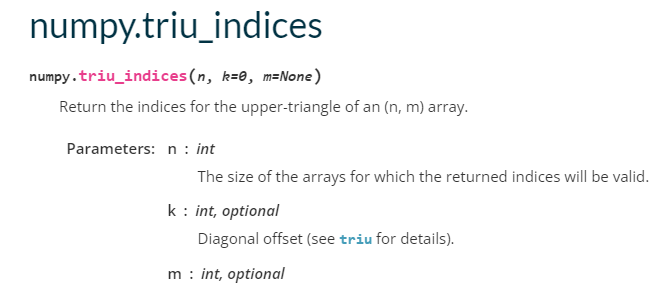

In [32]:
from IPython import display
display.Image("img/triu_indices.png")

In [70]:
X_sample = X.copy()
distances = pairwise_distances(X_sample, metric='cosine') # euclidean

In [71]:
distances

array([[2.22044605e-16, 1.34026292e-02, 6.84351674e-03, ...,
        4.83960015e-02, 5.26565867e-02, 7.18766672e-03],
       [1.34026292e-02, 0.00000000e+00, 4.72537597e-03, ...,
        3.82617385e-02, 3.65401012e-02, 7.42190697e-03],
       [6.84351674e-03, 4.72537597e-03, 0.00000000e+00, ...,
        6.02053693e-02, 6.06387218e-02, 1.11600627e-02],
       ...,
       [4.83960015e-02, 3.82617385e-02, 6.02053693e-02, ...,
        0.00000000e+00, 7.63927784e-04, 2.34579600e-02],
       [5.26565867e-02, 3.65401012e-02, 6.06387218e-02, ...,
        7.63927784e-04, 1.11022302e-16, 2.56686837e-02],
       [7.18766672e-03, 7.42190697e-03, 1.11600627e-02, ...,
        2.34579600e-02, 2.56686837e-02, 0.00000000e+00]])

In [74]:
np.triu_indices(len(X_sample), k=0)

(array([   0,    0,    0, ..., 1597, 1597, 1598]),
 array([   0,    1,    2, ..., 1597, 1598, 1598]))

In [72]:
average_similarity = np.mean(np.triu_indices(len(X_sample), k=0))

In [73]:
np.mean(np.triu_indices(len(X_sample), k=1))

799.0

In [64]:
len(np.triu_indices(len(X_sample), k=1)[0])/len(X_sample)

799.0

In [33]:
k = 2
# X_sample = resample(X, replace=True)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_sample)
labels = kmeans.labels_

In [ ]:
n_bootstrap = 25
prediction_strengths = []

for k in range(2, n_bootstrap):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sample)
    labels = kmeans.labels_
    
    average_similarity = np.mean(distances[np.triu_indices(len(X_sample), k=1)])
    prediction_strength = 1 - average_similarity
    prediction_strengths.append(prediction_strength)

In [17]:
# Средняя предсказательная сила
mean_prediction_strength = np.mean(prediction_strengths)
mean_prediction_strength

-37.116092201516174

In [18]:
prediction_strengths

[-37.55962890074529,
 -37.900208772488796,
 -37.63398268722385,
 -36.8334777993469,
 -36.633174852992546,
 -37.82840078599626,
 -36.83505668240209,
 -37.37063655738874,
 -35.915401675830495,
 -37.24428963822315,
 -37.423304109515236,
 -37.350377901257694,
 -36.05203988626516,
 -38.18363336089071,
 -37.25617513738996,
 -35.36657788977478,
 -36.81375563385225,
 -37.21327542559592,
 -36.53162806495481,
 -38.40819081454663,
 -37.689016295505176,
 -37.203506488628804,
 -36.42438127405664]

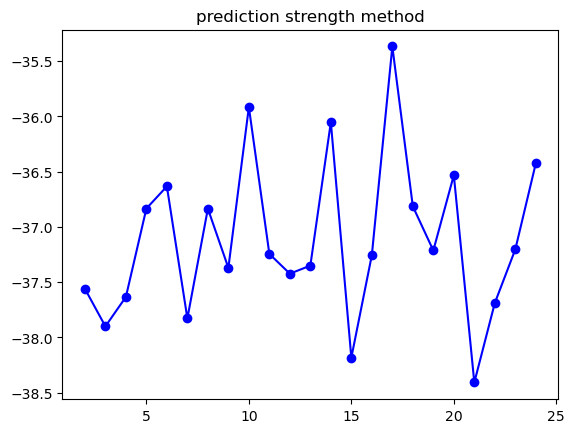

In [19]:
plt.plot(range(2, n_bootstrap), prediction_strengths, 'bo-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Average Silhouette Score')
plt.title('prediction strength method')
plt.show()

## 5.4 Analyze & Compare
Отримані результати порівняти і пояснити, який метод дав кращий результат і чому так (на Вашу думку).

## 6. За раніш обраної кількості кластерів
багаторазово проведіть кластеризацію методом k-середніх, використовуючи для початкової
ініціалізації метод k-means++.
Виберіть найкращий варіант кластеризації. Який кількісний критерій
Ви обрали для відбору найкращої кластеризації?

In [36]:
def clasters(optimal_k):
    kmeans = KMeans(n_clusters=optimal_k
                    ,random_state=42
                   )
    kmeans.fit(X)
    cluster_centers = kmeans.cluster_centers_

    for center in cluster_centers:
        print(center)

Links to help
https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

In [49]:
#??????? silhouette_score(X, labels)

In [37]:
clasters(2)

[ 8.42425785  0.51933418  0.26653944  2.39427481  0.08544614 12.37192536
 30.34435963  0.99667684  3.31552163  0.65653096 10.5402177 ]
[ 8.02595238  0.55164286  0.28342857  2.94452381  0.0931381  25.70833333
 91.72857143  0.99694274  3.2987381   0.66269048 10.09388889]


In [38]:
clasters(3)

[ 8.48238095  0.51944643  0.27061905  2.3710119   0.08449405  9.18333333
 22.95595238  0.99662838  3.31033333  0.64833333 10.58924603]
[7.88755187e+00 5.72365145e-01 2.75643154e-01 3.23236515e+00
 8.83983402e-02 2.61514523e+01 1.08506224e+02 9.96934730e-01
 3.28962656e+00 6.52033195e-01 1.00089212e+01]
[ 8.25675676  0.52067568  0.26938224  2.48822394  0.09185328 21.94498069
 55.73166023  0.99685102  3.32237452  0.6769112  10.3460103 ]


In [39]:
clasters(4)

[8.03229167e+00 5.54114583e-01 3.18645833e-01 3.38333333e+00
 8.96979167e-02 2.97447917e+01 1.31541667e+02 9.97048542e-01
 3.22781250e+00 6.93229167e-01 9.85625000e+00]
[ 8.53997271  0.52080491  0.27282401  2.38396999  0.08381855  8.43929059
 20.86630286  0.99662588  3.30608458  0.64739427 10.60322874]
[ 8.17398058  0.52219417  0.25413592  2.39883495  0.09004272 19.43009709
 48.24466019  0.99673575  3.33069903  0.67343689 10.39812298]
[ 8.08862745  0.54945098  0.28172549  2.94862745  0.0919098  24.84705882
 84.44313725  0.99700235  3.31737255  0.64498039 10.16843137]


## 7. Використовуючи функцію AgglomerativeClustering бібліотеки scikitlearn:
виконати розбиття набору даних на кластери. Кількість кластерів обрати такою ж самою, як і в попередньому методі. Вивести
координати центрів кластерів.

In [46]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X)

In [47]:
print(labels)

[0 0 0 ... 0 0 0]


In [48]:
cluster_centers = []
for cluster_label in range(3):
    cluster_points = X[labels == cluster_label]
    cluster_center = np.mean(cluster_points, axis=0)
    cluster_centers.append(cluster_center)

# Выводим координаты центроидов
for center in cluster_centers:
    print(center)

fixed acidity            8.170886
volatile acidity         0.530127
citric acid              0.256315
residual sugar           2.429325
chlorides                0.090435
free sulfur dioxide     19.587201
total sulfur dioxide    52.610408
density                  0.996791
pH                       3.334430
sulphates                0.665907
alcohol                 10.373277
dtype: float64
fixed acidity             7.980476
volatile acidity          0.557595
citric acid               0.288905
residual sugar            3.362857
chlorides                 0.089938
free sulfur dioxide      28.654762
total sulfur dioxide    111.342857
density                   0.996994
pH                        3.270714
sulphates                 0.659048
alcohol                   9.976587
dtype: float64
fixed acidity            8.580678
volatile acidity         0.516180
citric acid              0.280796
residual sugar           2.398378
chlorides                0.083588
free sulfur dioxide      8.023599
total s

## 8. Порівняти результати двох використаних методів кластеризації.